# Tema 6: Deustch-Jozsa

Curso ICC02.

Autor: Alejandro Mata Ali

En este notebook vamos a implementar el algoritmo de Deustch-Jozsa para diferentes oráculos.

## Librerías

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.visualization import plot_histogram
import numpy as np

---
# Circuito cuántico

Para el circuito cuántico tendremos que tener n+1 qubits, siendo los n primeros para la x del oráculo y el último iniciado en 1. Vamos a definirlo ya de forma abstracta con una función que reciba el número n y el oráculo como una instrucción.

In [7]:
def Deustch_Circuit(n:int, oracle):
    #Registros
    qr_x = QuantumRegister(n, 'qr_x')
    qr_y = QuantumRegister(1, 'qr_y')
    cr_x = ClassicalRegister(n, 'cr_x')
    #Circuito
    qc = QuantumCircuit(qr_x, qr_y, cr_x, name='Deutsch')

    # Incializar qr_y a 1
    qc.x(qr_y)
    qc.barrier()
    #Capa de H
    qc.h(qr_x[:] + qr_y[:])
    qc.barrier()

    #Oraculo
    qc.append(oracle, qr_x[:] + qr_y[:])
    qc.barrier()

    #Capa final de H
    qc.h(qr_x)
    qc.barrier()

    #Mediciones
    qc.measure(qr_x, cr_x)

    return qc

Ahora definamos un oráculo para introducir.  Vamos a probar con 3 bits de entrada y que implemente la función

$f(x)=1$ si $x_0=1$, sino $f(x)=0$

Esta es una función balanceada.

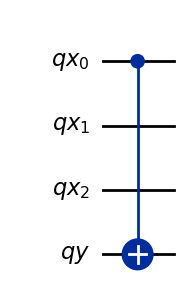

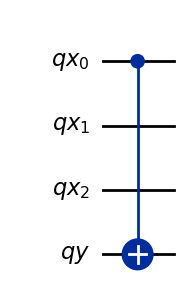

In [8]:
n = 3

#Registros
qr_x = QuantumRegister(n, 'qx')
qr_y = QuantumRegister(1, 'qy')

oracle = QuantumCircuit(qr_x, qr_y, name='Oracle')

#Puertas
oracle.cx(qr_x[0],qr_y[0])

oracle.draw('mpl')

Convertimos el oráculo en una gate.

In [9]:
oracle_gate = oracle.to_gate()

Creamos un circuito cuántico de esos n qubits.

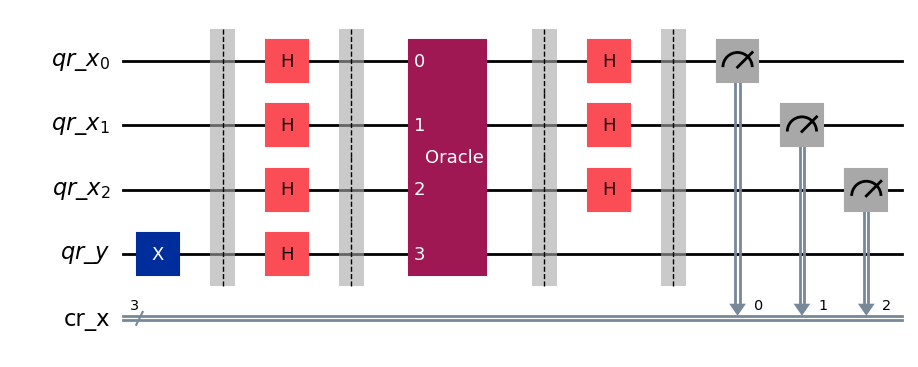

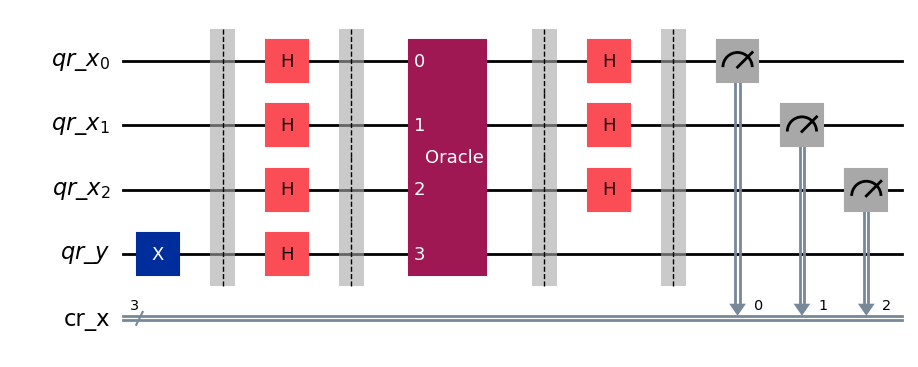

In [10]:
#Introducimos el oráculo y el número de qubits
qc = Deustch_Circuit(n, oracle_gate)

qc.draw('mpl')

---
# Ejecutando el circuito

Vamos a ejecutar el circuito cuántico en simulador. En principio, deberíamos obtener cualquier estado salvo el 000.

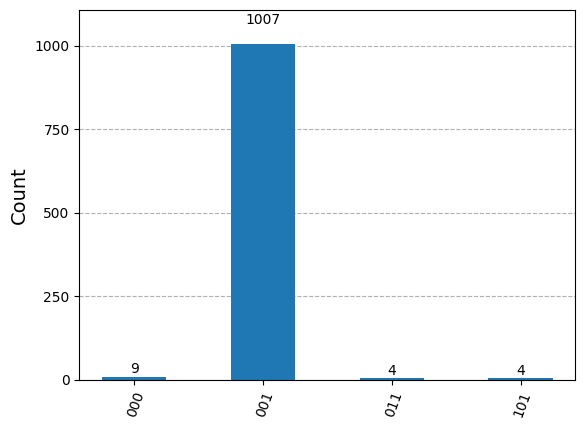

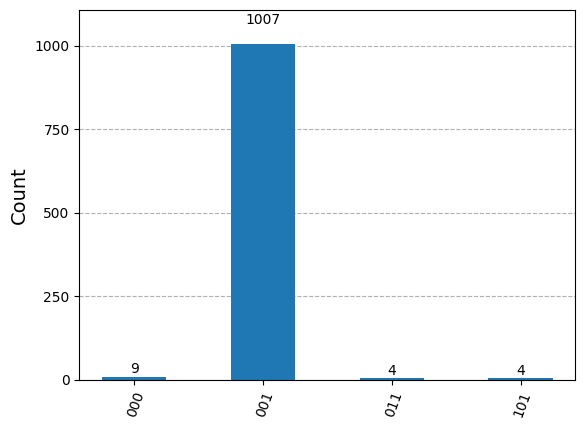

In [11]:
#El backend necesita n+1 qubits
backend = GenericBackendV2(num_qubits=n+1)

#Transpilamos
qc_transpiled = transpile(qc, backend)

#Creamos el job
job = backend.run(qc_transpiled)
#Obtenemos el resultado y sus cuentas
counts = job.result().get_counts()
#Ploteamos los histogramas de resultados
plot_histogram(counts)

Obtenemos que todas las medidas son para el 001, por lo que es balanceada, como esperábamos.

---
# Ejercicio con función constante

Ahora crea un oráculo de una función constante, conviértelo en una puerta y crea el circuito para la comprobación.

Luego, transpílalo y ejecútalo en local.

Si quieres, puedes probar a ejecutarlo en real.

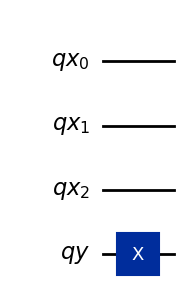

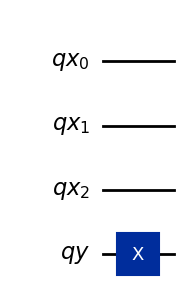

In [12]:
n = 3

#Registros
qr_x = QuantumRegister(n, 'qx')
qr_y = QuantumRegister(1, 'qy')

oracle = QuantumCircuit(qr_x, qr_y, name='Oracle')

#Puertas
oracle.x(qr_y[0])

oracle.draw('mpl')

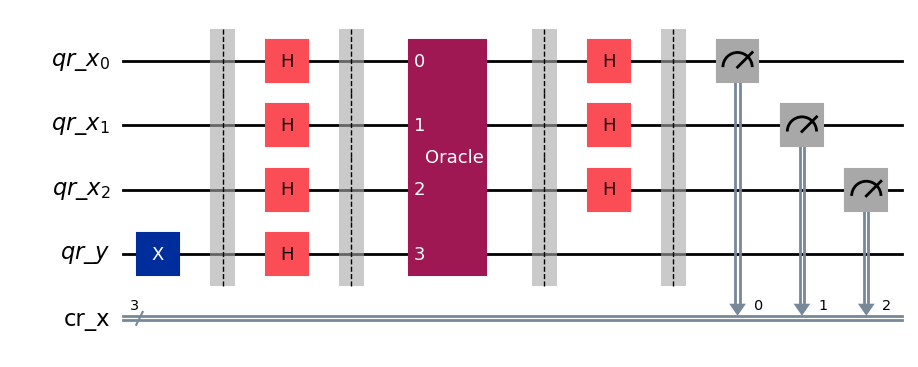

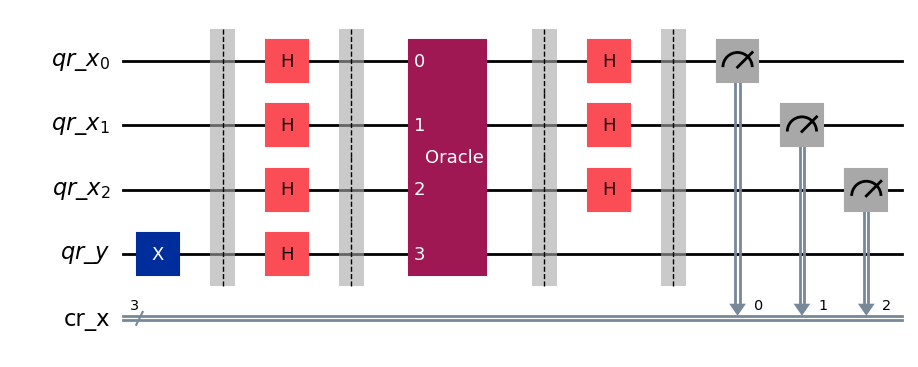

In [13]:
#Introducimos el oráculo y el número de qubits
oracle_gate = oracle.to_gate()
qc = Deustch_Circuit(n, oracle_gate)

qc.draw('mpl')

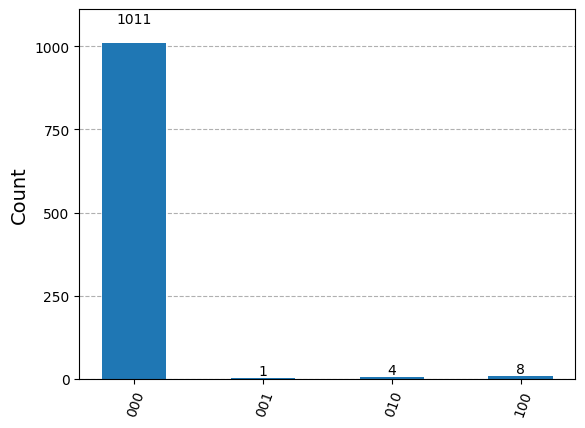

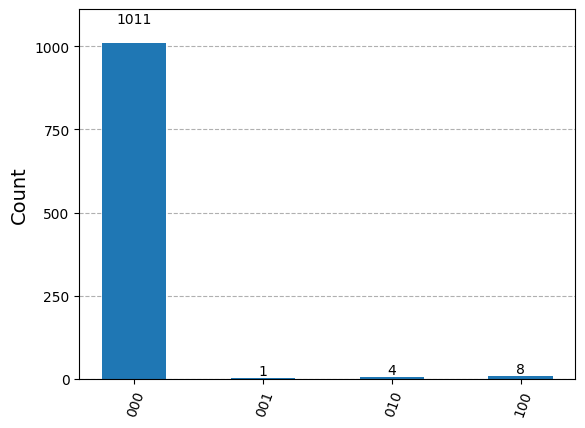

In [14]:
#El backend necesita n+1 qubits
backend = GenericBackendV2(num_qubits=n+1)

#Transpilamos
qc_transpiled = transpile(qc, backend)

#Creamos el job
job = backend.run(qc_transpiled)
#Obtenemos el resultado y sus cuentas
counts = job.result().get_counts()
#Ploteamos los histogramas de resultados
plot_histogram(counts)

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

>>> Job ID: csxx71m8cwag008wpjdg
>>> Job Status: QUEUED


>>> Job Status: QUEUED


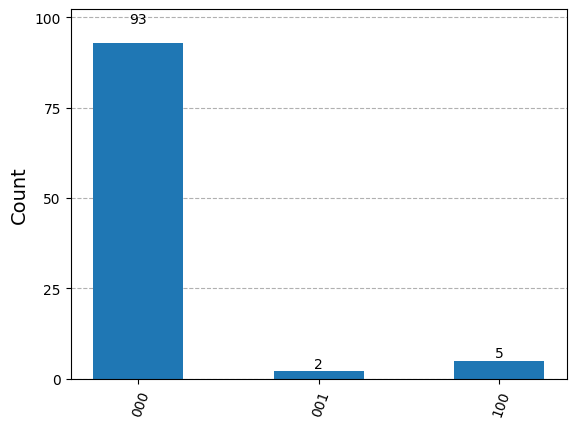

Vemos un cierto error.